# Sesi 14

1. Decision Tree
2. Random Forest
3. Ensemble method - bagging boosting stacking
4. Hyperparameter tuning - with GridSearchCV
5. Pipeline


# Decision Tree

Salah satu jenis algoritma ML untuk masalah tipe Classification


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

In [4]:
# load data
digits = load_digits()
X = digits.data
y = digits.target

In [5]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1257, 64) (540, 64) (1257,) (540,)


In [ ]:
# latih model decision tree
model_dt = DecisionTreeClassifier(max_depth=8,
                                  min_samples_split=3,
                                  min_samples_leaf=3,
                                  max_leaf_nodes=20,
                                  random_state=0
                                  )
model_dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [27]:
# buat prediksi menggunakan model
y_pred = model_dt.predict(X_test)

# cek akurasi model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        45
           1       0.79      0.81      0.80        52
           2       0.83      0.83      0.83        53
           3       0.85      0.85      0.85        54
           4       0.91      0.88      0.89        48
           5       0.91      0.89      0.90        57
           6       0.85      0.93      0.89        60
           7       0.87      0.75      0.81        53
           8       0.80      0.70      0.75        61
           9       0.72      0.86      0.78        57

    accuracy                           0.84       540
   macro avg       0.85      0.84      0.85       540
weighted avg       0.85      0.84      0.84       540



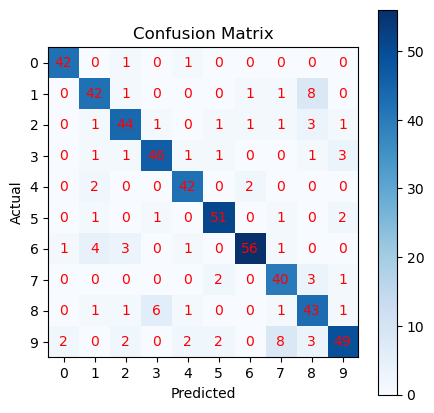

In [28]:
# confusion matrix
cm = confusion_matrix(y_pred, y_test)

# buat plot kosong, ukuran nya sama dengan confusion matrix
plt.figure(figsize=(5, 5))

# add text di dalam
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i,
                 cm[i, j],
                 ha="center",
                 va="center",
                 color="red"
                 )

# buat plot nya, pilih warna
plt.imshow(cm, cmap="Blues")

# tambah label
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# sesuaiin xticks dan yticks dengan kategori
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

# tambahan colorbar
plt.colorbar()

plt.show()

In [29]:
[str(i) for i in model_dt.classes_]

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

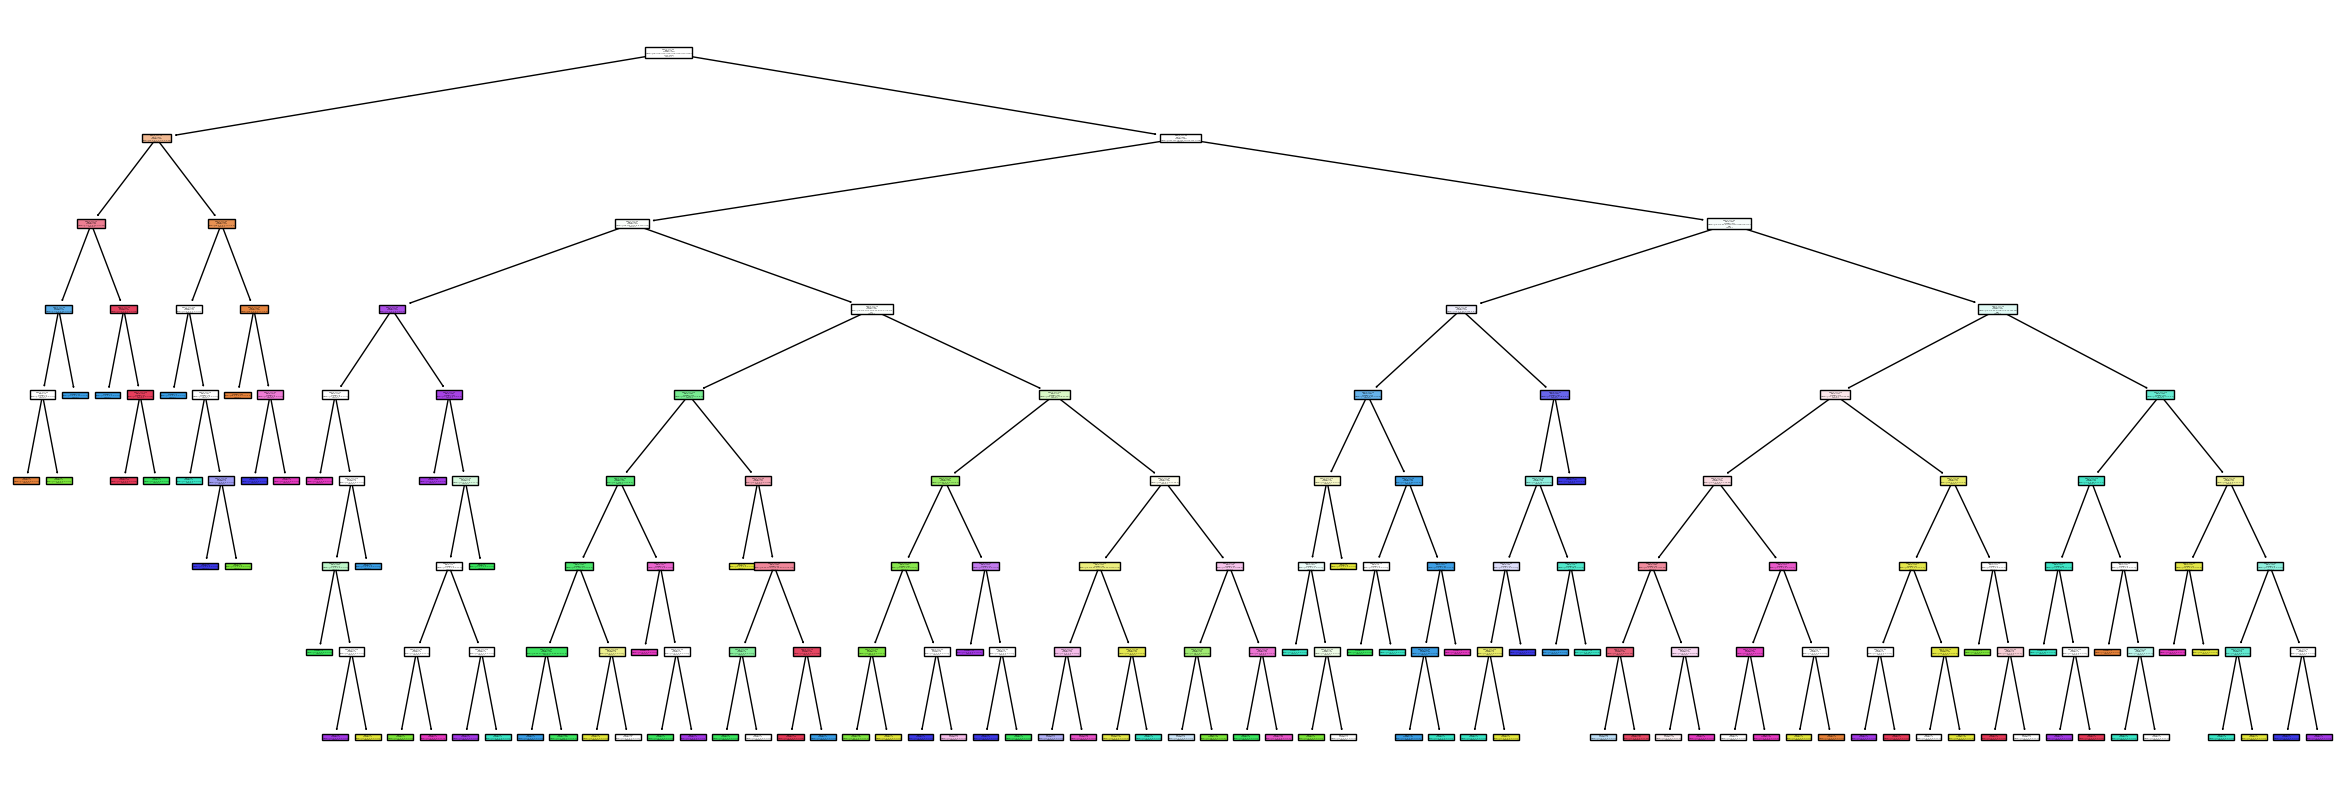

In [30]:
# Optional, visualisasi tree
plt.figure(figsize=(30, 10))
plot_tree(model_dt,
          # biasanya berguna untuk tau jenis fitur yang dipilih di tree
          feature_names=digits.feature_names,
          # setiap node majoritas class apa
          class_names=[str(i) for i in model_dt.classes_],
          filled=True,
          #   max_depth=2,
          )
plt.show()

decision tree kita bisa dibuat lebih robust lagi dengan menggunakan lebih dari 1 decision tree.

# Random Forest

algoritma ML yang menggunakan hasil "voting" dari banyak decision tree untuk membuat prediksi sebuah datapoint masuk class apa.

dengan menggunakan banyak tree yang di average, kita mengurangi possible error dari pembuatan 1 tree yang ada random pemilihan node pertamanya.


In [33]:
model_rf = RandomForestClassifier(n_estimators=300, max_depth=8)
model_rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
# buat prediksi menggunakan model
y_pred = model_rf.predict(X_test)

# cek akurasi model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       0.98      0.98      0.98        52
           2       1.00      0.96      0.98        53
           3       0.96      0.98      0.97        54
           4       1.00      0.98      0.99        48
           5       0.95      0.96      0.96        57
           6       0.98      1.00      0.99        60
           7       0.98      1.00      0.99        53
           8       0.98      0.97      0.98        61
           9       0.98      0.96      0.97        57

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



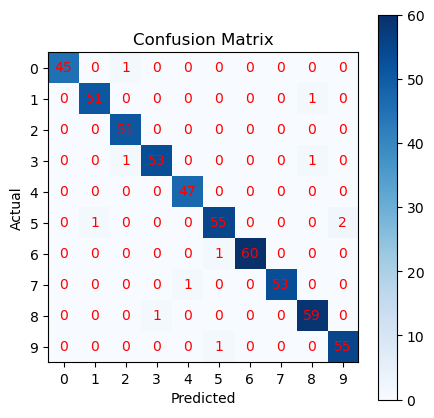

In [35]:
# confusion matrix
cm = confusion_matrix(y_pred, y_test)

# buat plot kosong, ukuran nya sama dengan confusion matrix
plt.figure(figsize=(5, 5))

# add text di dalam
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i,
                 cm[i, j],
                 ha="center",
                 va="center",
                 color="red"
                 )

# buat plot nya, pilih warna
plt.imshow(cm, cmap="Blues")

# tambah label
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# sesuaiin xticks dan yticks dengan kategori
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

# tambahan colorbar
plt.colorbar()

plt.show()

In [42]:
# model random forest ini bisa memberitahu kita fitur mana yang paling berefek
pd.Series(model_rf.feature_importances_).sort_values()

0     0.000000
39    0.000000
32    0.000000
40    0.000006
56    0.000007
        ...   
33    0.036245
26    0.042067
36    0.042421
43    0.045545
21    0.050248
Length: 64, dtype: float64

karena teknik pemisahan data di decision tree tidak berbasis gabungan angka antar fitur seperti linear regression, teknik seperti:

- scaling tidak memberi efek
- regularization yang kita gunakan hanya teknik "pruning" dengan memilih jumlah branch maximal, leaf maximal, minimal size leaf, dll

untuk membuat tree yang lebih baik, kita bisa gunakan teknik ensemble seperti Random Forest, biasanya selalu lebih bagus dari single deceision tree. Bisa juga hasil random forest nya kita gunakan untuk memperbaiki model decision tree kita.

- feature*importances* untuk memilih fitur2 yg paling penting saja

tips lainnya:

- balance data, jumlah sample per category mirip2


# Ensemble Learning: Stacking

selain teknik Bagging seperti random forest dimana kita gunakan ML yang sama (decision tree) ber kali kali, kita bisa juga gunakan model ML berbeda beda dengan teknik Stacking.

step 1: latih data dengan berbagai model ML berbeda  
step 2: hasil latih digunakan sebagai data untuk model ML terakhir

jadilah model tipe Stacking


In [45]:
# misalkan kita pakai random forest dan decision tree untuk estimator (step 1)
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=8, random_state=0)),
    ('dt', DecisionTreeClassifier(max_depth=8, random_state=0))
]

# lalu pakai logistic regression untuk step kedua
model_stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

# setelah selesai memilih model2 yg digunakan untuk stacking, kita latih
model_stacking.fit(X_train, y_train)

,estimators,"[('rf', ...), ('dt', ...)]"
,final_estimator,LogisticRegression()
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,n_estimators,100
,criterion,'gini'
,max_depth,8
,min_samples_split,2


In [46]:
# cek akurasi model
y_pred = model_stacking.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       0.96      0.94      0.95        52
           2       0.98      0.94      0.96        53
           3       0.93      0.94      0.94        54
           4       0.98      0.96      0.97        48
           5       0.98      0.96      0.97        57
           6       1.00      0.97      0.98        60
           7       0.96      0.98      0.97        53
           8       0.92      0.93      0.93        61
           9       0.90      0.95      0.92        57

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



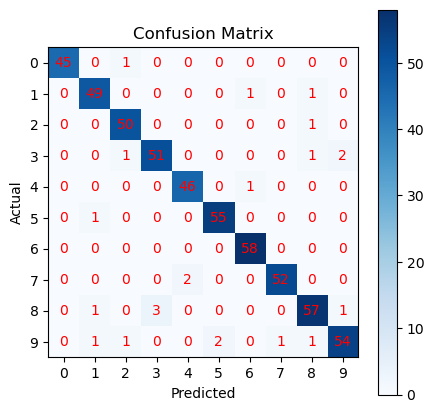

In [47]:
# confusion matrix
cm = confusion_matrix(y_pred, y_test)

# buat plot kosong, ukuran nya sama dengan confusion matrix
plt.figure(figsize=(5, 5))

# add text di dalam
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i,
                 cm[i, j],
                 ha="center",
                 va="center",
                 color="red"
                 )

# buat plot nya, pilih warna
plt.imshow(cm, cmap="Blues")

# tambah label
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# sesuaiin xticks dan yticks dengan kategori
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

# tambahan colorbar
plt.colorbar()

plt.show()

pro:

- biasanya teknik stacking lebih akurat dibanding menggunakan 1 model saja

con:

- sulit untuk di interpretasi, lebih complex
- lebih lambat (saat training)


### Bagging

mengurangi error dengan menggunakan banyak model yg sama berkali kali

### Boosting

mengurangi bias dengan terus mencoba memperbaiki error model di step sebelumnya

### Stacking

menggunakan banyak model berbeda sekaligus


# Hyperparameter Tuning

parameter yang kita gunakan untuk model sebelum latihan dimulai, bisa kita coba "tune" untuk memaksimalkan hasil model yang dilatih

contoh:

- Logistic Regression
  - penalty (tipe regularization)
  - C (kekuatan regularization)
  - solver (cara model mencapai best fit)
- Decision Tree
  - max_depth
  - min_samples_split
  - min_samples_leaf
  - max_leaf_nodes
  - criterion
- Random Forest
  - n_estimators

untuk setiap jenis model ML, bisa ada parameter yang kita set, yang akan mengubah hasil akhir model yang sudah dilatih. Kita bisa secara manual by trial and error mengubah parameter2 ini, untuk mendapatkan model terbaik. Atau kita pakai saja "GridSearchCV" dari sklearn untuk secara cepat mencoba kombinasi parameter yang kita inginkan.


In [49]:
# misalnya kita pakai random forest
param_grid = {
    "n_estimators": [100, 300, 1000],
    "max_depth": [8, 9, 10],
    "min_samples_split": [1, 3, 5, 10]
}

model_rf = RandomForestClassifier(random_state=0)

model_rf_grid = GridSearchCV(model_rf, param_grid)
model_rf_grid.fit(X_train, y_train)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
45 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 471, in _validate_params
    validate_p

,estimator,RandomForestC...andom_state=0)
,param_grid,"{'max_depth': [8, 9, ...], 'min_samples_split': [1, 3, ...], 'n_estimators': [100, 300, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [50]:
# cek parameter terbaik
print("Best params:", model_rf_grid.best_params_)
print("Best score:", model_rf_grid.best_score_)

Best params: {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 100}
Best score: 0.9697685448681466


# Pipeline

pipeline membantu kita menyusun feature transformation dengan cepat dan konsisten

misalkan kita mau latih model Logistic Regression, dengan data yang di scaling StandardScaler, lalu kita masukkan ke Randomized Search CV


In [ ]:
pipe = Pipeline([
    ("scaler", StandardScaler()),   # step 1: scaling data
    ("lr", LogisticRegression())    # step 2: logistic regression
])

pipe.fit(X_train, y_train)  # datanya akan melewati step 1, baru step 2

,steps,"[('scaler', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [63]:
# menggunakan RandomizedSearchCV
param_random = {
    "lr__penalty": ["l2"],
    "lr__C": range(1, 100)
}

model_random = RandomizedSearchCV(
    pipe,
    param_distributions=param_random,
    n_iter=10)

model_random.fit(X_train, y_train)

print("Best params:", model_random.best_params_)
print("Best score:", model_random.best_score_)

Best params: {'lr__penalty': 'l2', 'lr__C': 14}
Best score: 0.9626067159931703
